In [15]:
# calculate forecast error
expected = [0.0, 0.5, 0.0, 0.5, 0.0]
predictions = [0.2, 0.4, 0.1, 0.6, 0.2]
forecast_errors = [expected[i]-predictions[i] for i in range(len(expected))]
print('Forecast Errors: %s' % forecast_errors)

Forecast Errors: [-0.2, 0.09999999999999998, -0.1, -0.09999999999999998, -0.2]


In [2]:
# Calculating mean forecast error (forecast bias)
bias = sum(forecast_errors) * 1.0/len(expected)
print('Bias: %f' % bias)

Bias: -0.100000


In [13]:
# calculate mean absolute error
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(expected, predictions)
print('MAE: %f' % mae)

MAE: 0.140000


In [12]:
# Calculating mean absolute percentage error
mape = mean_absolute_error(expected, predictions)*100
print(mape)

13.999999999999998


In [19]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(expected, predictions)

450359962737049.7

In [17]:
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
mean_absolute_percentage_error(y_true, y_pred)

0.3273809523809524

In [4]:
# calculate mean squared error
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(expected, predictions)
print('MSE: %f' % mse)

MSE: 0.022000


In [5]:
# calculate root mean squared error
from sklearn.metrics import mean_squared_error
from math import sqrt

mse = mean_squared_error(expected, predictions)
rmse = sqrt(mse)
print('RMSE: %f' % rmse)

RMSE: 0.148324


In [27]:


import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

series = pd.read_csv("shampoo_sales.csv")
series.drop('Month', axis = 1, inplace = True)

In [28]:
series.head()

,Sales
0,266.0
1,145.9
2,183.1
3,119.3
4,180.3


In [31]:
# Step 1: Define the Supervised Learning Problem
# Create lagged dataset
values = pd.DataFrame(series.values)
dataframe = pd.concat([values.shift(1), values], axis=1)
#dataframe.columns = ['t', 't+1']
print(dataframe.head(5))

       0      0
0    NaN  266.0
1  266.0  145.9
2  145.9  183.1
3  183.1  119.3
4  119.3  180.3


In [32]:
# Step 2: # split into train and test sets
X = dataframe.values
train_size = int(len(X) * 0.66)
train, test = X[1:train_size], X[train_size:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]

In [34]:
# Step 3: persistence model
def model_persistence(x):
    return x

In [35]:
# Step 4: Make and Evaluate Forecast
# walk-forward validation
predictions = list()
for x in test_X:
    yhat = model_persistence(x)
    predictions.append(yhat)
rmse = sqrt(mean_squared_error(test_y, predictions))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 133.156


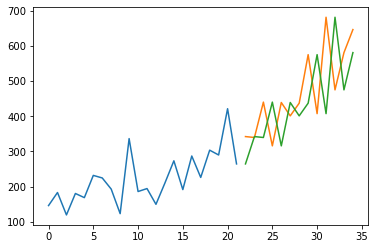

In [36]:
#Finally, a plot is made to show the training dataset and the diverging predictions from the
#expected values from the test dataset.

# plot predictions and expected results
plt.plot(train_y)
plt.plot([None for i in train_y] + [x for x in test_y])
plt.plot([None for i in train_y] + [x for x in predictions])
plt.show()

From the plot of the persistence model predictions, it is
clear that the model is one-step behind reality. There is a rising trend and month-to-month
noise in the sales figures, which highlights the limitations of the persistence technique.